# Proyek Klasifikasi Gambar: Garbage Classification (12 classes)
- **Nama:** Rendika Nurhartanto Suharto
- **Email:** rendikarendi96@gmail.com
- **ID Dicoding:** RENDIKA NURHARTANTO SUHARTO

## Import Semua Packages/Library yang Digunakan

In [55]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time
from tqdm import tqdm

#PATH PROCESS
import os
import glob
from pathlib import Path

#IMAGE PROCESS
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical

#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, balanced_accuracy_score, precision_score, recall_score, f1_score, average_precision_score

#OPTIMIZER
from keras.optimizers import RMSprop, Adam, SGD

#MODEL LAYERS
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, \
                                    MaxPooling2D, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, \
                                    Convolution2D, ZeroPadding2D, LSTM, SimpleRNN, GRU, Bidirectional, Permute, \
                                    TimeDistributed
from tensorflow.keras.applications import VGG16, VGG19, InceptionV3
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras import models
from keras import layers
import tensorflow as tf
from keras.utils import plot_model
import keras
from tensorflow.keras.models import load_model

#IGNORING WARNINGS
import warnings
warnings.filterwarnings("ignore")

#PLOT TYPE
plt.style.use("classic")

In [56]:
import tensorflow as tf
print(tf.__version__)

2.15.1


In [4]:
# !pip install tensorflow==2.13.0

# import tensorflow as tf
# print(tf.__version__)

## Data Preparation

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

### Set-up Env Variable kaggle config & Download Data

In [6]:
# # Set-up Env Variable for kaggle Config
# os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Colab Notebooks/9.1 DBS Foundation x Dicoding Kelas Menengah 2024'

# # Tentukan path untuk menyimpan dataset
# path_to_save = '/content/drive/MyDrive/Colab Notebooks/9.1 DBS Foundation x Dicoding Kelas Menengah 2024/Dataset/'

# # Buat direktori jika belum ada
# os.makedirs(path_to_save, exist_ok=True)

# # Unduh dataset menggunakan perintah kaggle
# !kaggle datasets download -d mostafaabla/garbage-classification -p '{path_to_save}'

In [7]:
# # Ekstrak dataset
# !unzip '{path_to_save}/garbage-classification.zip' -d '{path_to_save}'

# # Hapus file zip jika diperlukan
# os.remove(f'{path_to_save}/garbage-classification.zip')

### Data Loading

In [8]:
# dataPath = path_to_save + "garbage_classification" # Di Google-Colab
dataPath = "/kaggle/input/garbage-classification/garbage_classification" # Di Kaggle Notebook

#### Check the Resolution

In [9]:
from PIL import Image
import os

def print_images_resolution(directory):
    unique_sizes = set()
    total_images = 0

    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        image_files = os.listdir(subdir_path)
        num_images = len(image_files)
        print(f"{subdir}: {num_images}")
        total_images += num_images

        for img_file in image_files:
            img_path = os.path.join(subdir_path, img_file)
            with Image.open(img_path) as img:
                unique_sizes.add(img.size)

        for size in unique_sizes:
            print(f"- {size}")
        print("---------------")

    print(f"\nTotal: {total_images}")

In [10]:
print_images_resolution(dataPath)

metal: 769
- (225, 224)
- (200, 252)
- (363, 139)
- (201, 251)
- (223, 226)
- (220, 218)
- (276, 183)
- (150, 150)
- (199, 253)
- (259, 194)
- (180, 157)
- (347, 145)
- (266, 190)
- (272, 185)
- (258, 195)
- (287, 176)
- (247, 204)
- (270, 187)
- (339, 149)
- (256, 197)
- (262, 192)
- (245, 206)
- (291, 173)
- (246, 205)
- (251, 201)
- (306, 164)
- (309, 163)
- (349, 144)
- (298, 169)
- (260, 194)
- (249, 203)
- (250, 202)
- (233, 216)
- (180, 180)
- (234, 215)
- (293, 172)
- (318, 159)
- (248, 204)
- (232, 217)
- (235, 215)
- (236, 214)
- (310, 163)
- (224, 224)
- (271, 186)
- (276, 182)
- (220, 229)
- (225, 225)
- (275, 183)
- (261, 193)
- (174, 289)
- (266, 189)
- (287, 175)
- (250, 199)
- (265, 190)
- (294, 171)
- (297, 170)
- (254, 199)
- (285, 177)
- (286, 176)
- (184, 275)
- (277, 182)
- (269, 187)
- (311, 162)
- (280, 156)
- (300, 168)
- (243, 207)
- (306, 165)
- (307, 164)
- (207, 244)
- (208, 243)
- (228, 221)
- (236, 213)
- (227, 222)
- (200, 253)
- (278, 181)
- (477, 106)
-

#### Check the Labels

In [11]:
# Files_Name
pd.DataFrame(os.listdir(dataPath),columns=['Files_Name'])

Files_Name
0         metal
1   white-glass
2    biological
3         paper
4   brown-glass
5       battery
6         trash
7     cardboard
8         shoes
9       clothes
10      plastic
11  green-glass

#### Get the Directory of Every Data

In [12]:
files = [i for i in glob.glob(dataPath + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pd.DataFrame(data, columns = ["Image", "Label"])
dataframe

Image        Label
0      /kaggle/input/garbage-classification/garbage_c...        shoes
1      /kaggle/input/garbage-classification/garbage_c...      clothes
2      /kaggle/input/garbage-classification/garbage_c...      clothes
3      /kaggle/input/garbage-classification/garbage_c...  white-glass
4      /kaggle/input/garbage-classification/garbage_c...      clothes
...                                                  ...          ...
15510  /kaggle/input/garbage-classification/garbage_c...      clothes
15511  /kaggle/input/garbage-classification/garbage_c...      battery
15512  /kaggle/input/garbage-classification/garbage_c...  green-glass
15513  /kaggle/input/garbage-classification/garbage_c...      clothes
15514  /kaggle/input/garbage-classification/garbage_c...      clothes

[15515 rows x 2 columns]

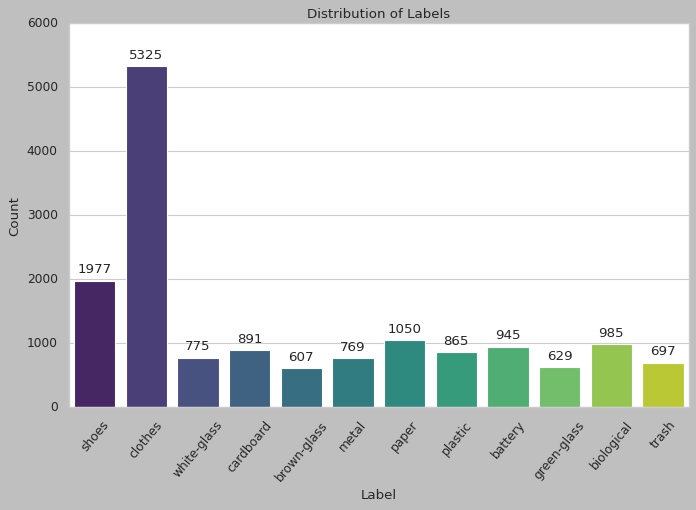

In [13]:
# Menghitung jumlah setiap label
label_counts = dataframe["Label"].value_counts()

# Membuat plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x=dataframe["Label"], palette="viridis")

# Menambahkan label pada setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10), textcoords = 'offset points')

# Menambahkan judul dan label sumbu
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.show()

#### Show The Sample Data

In [14]:
# Fungsi untuk menampilkan satu gambar dari setiap kelas
def show_one_image_per_class(directory):
    classes = os.listdir(directory)
    num_classes = len(classes)

    # Atur ukuran figure untuk memperbesar gambar
    plt.figure(figsize=(20, 15))

    rows = 4
    cols = 3

    for i, cls in enumerate(classes):
        class_path = os.path.join(directory, cls)
        image_files = os.listdir(class_path)
        img_file = random.choice(image_files)

        img_path = os.path.join(class_path, img_file)
        with Image.open(img_path) as img:
            ax = plt.subplot(rows, cols, i + 1)
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(cls, fontsize=14)

    plt.tight_layout()
    plt.show()

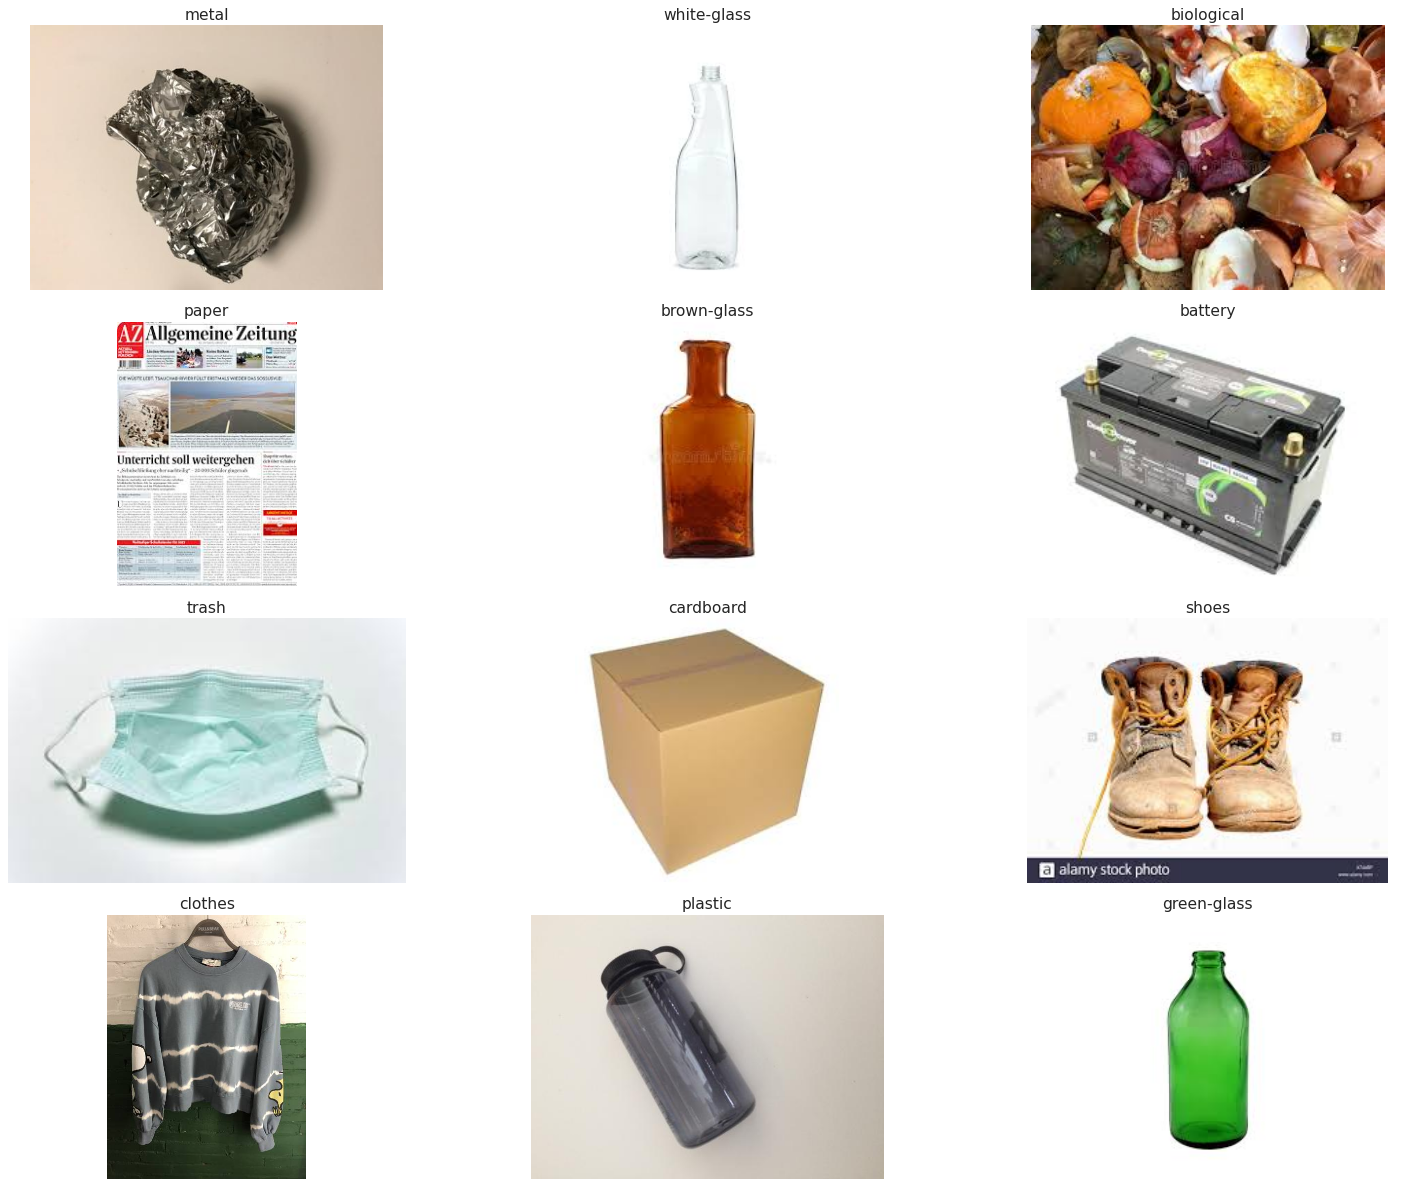

In [15]:
# Panggil fungsi untuk menampilkan gambar
show_one_image_per_class(dataPath)

### Data Preprocessing

#### Split Dataset

In [16]:
train_data_dir = dataPath
batch_size = 128
target_size = (224, 224)
validation_split = 0.2
seed_value = 50

In [17]:
# Membuat dataset pelatihan dan validasi - menggunakan [image_dataset_from_directory]
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=seed_value,
    image_size=target_size,
    batch_size=batch_size,
)
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=seed_value,
    image_size=target_size,
    batch_size=batch_size,
)

Found 15515 files belonging to 12 classes.
Using 12412 files for training.
Found 15515 files belonging to 12 classes.
Using 3103 files for validation.


In [18]:
# Mendapatkan nama kelas dan membuat mapping ke indeks
class_names = train_dataset.class_names
class_indices = {name: index for index, name in enumerate(class_names)}

# Mencetak informasi mengenai data training dan validasi
print("TRAIN: ")
print("Classes: ", class_names)
print("Class Indices: ", class_indices)
print("Image shape: ", train_dataset.element_spec[0].shape)
print("---"*20)
print("VALIDATION: ")
print("Classes: ", validation_dataset.class_names)
print("Image shape: ", validation_dataset.element_spec[0].shape)

TRAIN: 
Classes:  ['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass']
Class Indices:  {'battery': 0, 'biological': 1, 'brown-glass': 2, 'cardboard': 3, 'clothes': 4, 'green-glass': 5, 'metal': 6, 'paper': 7, 'plastic': 8, 'shoes': 9, 'trash': 10, 'white-glass': 11}
Image shape:  (None, 224, 224, 3)
------------------------------------------------------------
VALIDATION: 
Classes:  ['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass']
Image shape:  (None, 224, 224, 3)


In [19]:
# # Mengoptimalkan dataset untuk performa
# train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
# validation_dataset = validation_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

## Modelling

In [20]:
# #Penggunaan Callback untuk menghentikan proses training sesuai akurasi yang diinginkan

# class myCallback(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs={}):
#         val_accuracy = logs.get('val_accuracy')
#         accuracy = logs.get('accuracy')

#         if val_accuracy is not None and accuracy is not None:
#             if val_accuracy > 0.95 and accuracy > 0.95:
#                 print("\nSudah >95% nih akurasinya jadi diberhentikan saja!")
#                 self.model.stop_training = True
#             else:
#                 print("\nBelum mencapai akurasi >95%, lanjutkan training.")
#         else:
#             print("\nNilai akurasi tidak tersedia. Lanjutkan training.")


# callbacks = myCallback()

In [21]:
# Nonaktifkan XLA
tf.config.optimizer.set_jit(False)

# Membuat base model dengan EfficientNetV2B1
base_model = tf.keras.applications.EfficientNetV2B1(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# Membuat model lengkap
keras_model = keras.models.Sequential()
keras_model.add(base_model)
keras_model.add(keras.layers.Flatten())
keras_model.add(keras.layers.Dense(256, activation=tf.nn.relu))
keras_model.add(keras.layers.Dropout(0.5))
keras_model.add(keras.layers.Dense(12, activation=tf.nn.softmax))  # 12 classes

# Kompilasi model
keras_model.compile(optimizer='Adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [22]:
# Definisikan callback tanpa ModelCheckpoint karena saya kurang suka menggunakan itu
Callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=12,
        verbose=2,
        restore_best_weights=True
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=12,
        verbose=2,
        min_lr=1e-6
    )
]

In [23]:
start_time = time.time()

history_EfficientNetV2B1 = keras_model.fit(train_dataset, epochs=15, validation_data=validation_dataset, callbacks= Callbacks)

end_time = time.time()

duration = end_time - start_time
print("Duration:", duration, "Seconds")
print("Duration:", duration/60, "Minutes")
print("Duration:", duration/3600, "Hours")

Epoch 1/15


2024-08-10 02:08:19.973318: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/efficientnetv2-b1/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1723255706.381067     667 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


97/97 [==============================] - 57s 417ms/step - loss: 0.9286 - accuracy: 0.8306 - val_loss: 0.2496 - val_accuracy: 0.9433 - lr: 0.0010
Epoch 2/15
97/97 [==============================] - 33s 332ms/step - loss: 0.3162 - accuracy: 0.9181 - val_loss: 0.1995 - val_accuracy: 0.9507 - lr: 0.0010
Epoch 3/15
97/97 [==============================] - 32s 321ms/step - loss: 0.2382 - accuracy: 0.9373 - val_loss: 0.1757 - val_accuracy: 0.9523 - lr: 0.0010
Epoch 4/15
97/97 [==============================] - 32s 323ms/step - loss: 0.1953 - accuracy: 0.9472 - val_loss: 0.1910 - val_accuracy: 0.9536 - lr: 0.0010
Epoch 5/15
97/97 [==============================] - 32s 323ms/step - loss: 0.1785 - accuracy: 0.9491 - val_loss: 0.1849 - val_accuracy: 0.9578 - lr: 0.0010
Epoch 6/15
97/97 [==============================] - 32s 323ms/step - loss: 0.1560 - accuracy: 0.9571 - val_loss: 0.1783 - val_accuracy: 0.9568 - lr: 0.0010
Epoch 7/15
97/97 [==============================] - 32s 323ms/step - loss: 

## Evaluasi dan Visualisasi

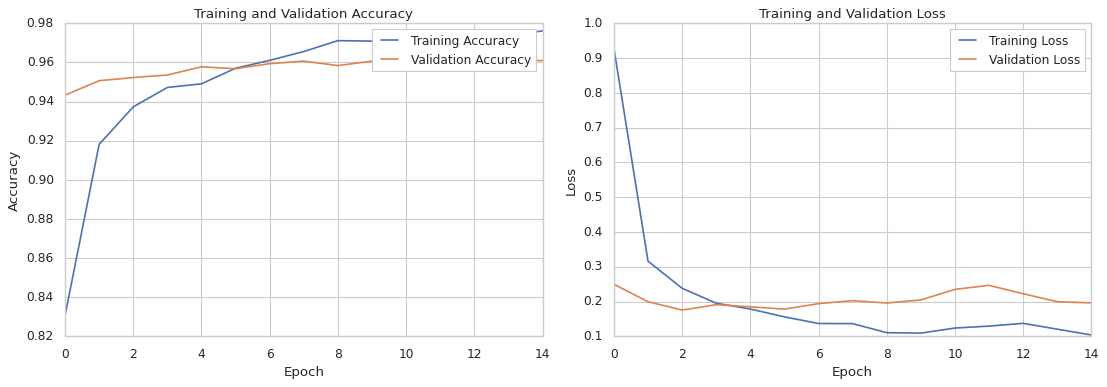

In [24]:
# Mengambil data dari history
history = history_EfficientNetV2B1.history

# Plot akurasi
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot kehilangan (loss)
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
score, acc = keras_model.evaluate(validation_dataset)
print('Test Loss =', score)
print('Test Accuracy =', acc)

25/25 [==============================] - 7s 225ms/step - loss: 0.1757 - accuracy: 0.9523
Test Loss = 0.17565837502479553
Test Accuracy = 0.9523042440414429


In [26]:
X_val,y_val,y_pred=[],[],[]
for images, labels in validation_dataset:
    y_val.extend(labels.numpy())
    X_val.extend(images.numpy())
predictions=keras_model.predict(np.array(X_val))
for i in predictions:
    y_pred.append(np.argmax(i))
df=pd.DataFrame()
df['Actual'],df['Prediction']=y_val,y_pred
df

97/97 [==============================] - 10s 60ms/step


Actual  Prediction
0          4           4
1          4           4
2          4           4
3          9           9
4          4           4
...      ...         ...
3098       3           3
3099       6           3
3100       4           4
3101       9           9
3102       9           9

[3103 rows x 2 columns]

In [27]:
Acc = accuracy_score(y_val,y_pred)
print("accuracy is: {0:.4f}%".format(Acc * 100))

accuracy is: 95.2304%


In [28]:
# Evaluasi model
print("Classification Report:\n", classification_report(y_val,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       175
           1       0.98      0.98      0.98       212
           2       0.89      0.92      0.90       109
           3       0.97      0.92      0.95       172
           4       0.99      0.99      0.99      1092
           5       0.89      0.90      0.90       120
           6       0.85      0.88      0.86       144
           7       0.94      0.97      0.96       212
           8       0.83      0.84      0.83       176
           9       0.97      0.98      0.98       389
          10       0.96      0.95      0.95       146
          11       0.85      0.81      0.83       156

    accuracy                           0.95      3103
   macro avg       0.93      0.93      0.93      3103
weighted avg       0.95      0.95      0.95      3103



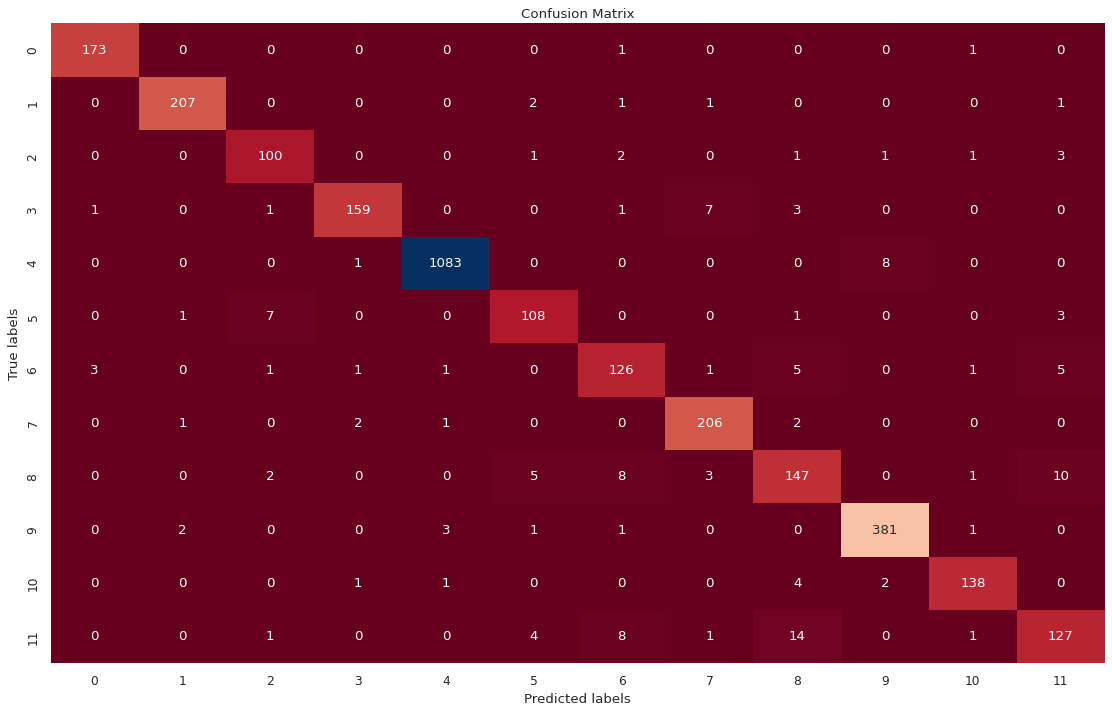

In [29]:
# Set the figure size
plt.figure(figsize=(17, 10))
ax= plt.subplot()
CM = confusion_matrix(y_val,y_pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

In [30]:
# Menghitung metrik evaluasi
precision = precision_score(y_val,y_pred, average='weighted')  # Menggunakan average='weighted'
recall = recall_score(y_val,y_pred, average='weighted')  # Menggunakan average='weighted'
f1 = f1_score(y_val,y_pred, average='weighted')  # Menggunakan average='weighted'
conf_matrix = confusion_matrix(y_val,y_pred)
balanced_accuracy = balanced_accuracy_score(y_val,y_pred)

# Mencetak hasil evaluasi
print("Evaluasi Model:")
print("------------------")
print(f"Precision         : {precision:.5f}")
print(f"Recall            : {recall:.5f}")
print(f"F1-Score          : {f1:.5f}")
print(f"Balanced Accuracy : {balanced_accuracy:.5f}")
print("------------------")

Evaluasi Model:
------------------
Precision         : 0.95241
Recall            : 0.95230
F1-Score          : 0.95227
Balanced Accuracy : 0.92661
------------------


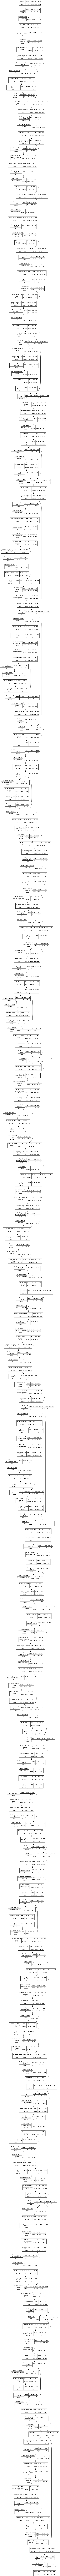

In [31]:
tf.keras.utils.plot_model(keras_model, to_file='Current_model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=100)
tf.keras.utils.plot_model(base_model, to_file='Base_model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=100)

## Saving Model

### Format SavedModel: Standart TensorFlow

In [32]:
save_path = '/kaggle/working/SavedModel/'
tf.saved_model.save(keras_model, save_path)

In [54]:
# Simpan model ke format .keras
keras_model.save('/kaggle/working/GarbageClassification.keras', save_format='keras')

## Konversi Model

### Format TFJS: TensorFlow.js

In [33]:
!pip install tensorflowjs

In [34]:
!tensorflowjs_converter \
    --input_format=tf_saved_model \
    /kaggle/working/SavedModel/ \
    /kaggle/working/modeltfjs

2024-08-10 02:18:09.610124: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-10 02:18:09.610186: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-10 02:18:09.611743: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Format TFLite: Tensorflow Lite

In [52]:
import tensorflow as tf
print(tf.__version__)

2.15.1


In [53]:
converter = tf.lite.TFLiteConverter.from_saved_model(save_path)
tflite_model = converter.convert()

with tf.io.gfile.GFile('/kaggle/working/GarbageClassification.tflite', 'wb') as f:
    f.write(tflite_model)

Summary on the non-converted ops:
---------------------------------
 * Accepted dialects: tfl, builtin, func
 * Non-Converted Ops: 239, Total Ops 648, % non-converted = 36.88 %
 * 239 ARITH ops

- arith.constant:  239 occurrences  (f32: 229, i32: 10)



  (f32: 21)
  (f32: 92)
  (f32: 19)
  (f32: 2)
  (f32: 86)
  (f32: 19)
  (f32: 88)
  (i32: 19)
  (f32: 20)
  (i32: 19)
  (f32: 1)
  (i32: 19)
  (f32: 1)


## Inference (Optional)

### Lokal Dulu

In [36]:
# Path ke direktori tempat model disimpan
save_path = '/kaggle/working/SavedModel/'
loaded_model = tf.saved_model.load(save_path)

In [37]:
# Example for inference if the model has a default serving signature:
infer = loaded_model.signatures["serving_default"]

def images_preprocessing(filename):
    image = tf.io.decode_image(open(filename, 'rb').read(), channels=3)  # Membaca dan decode gambar
    image = tf.image.resize(image, [224, 224])  # Resize gambar ke ukuran yang sesuai dengan model
    image = image / 255.0  # Normalisasi gambar

    image_tensor = tf.expand_dims(image, 0)  # Tambahkan dimensi batch
    return image_tensor

In [43]:
# Nama file gambar untuk inferensi
filename = '/kaggle/input/garbage-classification/garbage_classification/white-glass/white-glass103.jpg'
image_tensor = images_preprocessing(filename=filename)

In [65]:
# Lakukan inferensi
predictions = infer(tf.constant(image_tensor))  # Menggunakan model untuk prediksi

# Mendapatkan kelas dengan probabilitas tertinggi
predicted_class = tf.argmax(predictions['dense_1'][0]).numpy()  # 'output_0' adalah output dari model
print(f'Predicted class: {predicted_class}')

Predicted class: 11


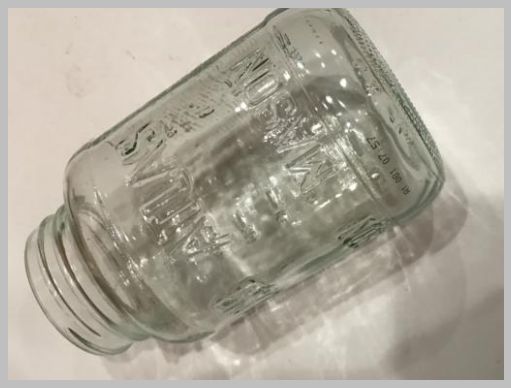

Prediksi:  white-glass


In [69]:
# Mapping label
map_labels = {
        0: "battery",
        1: "biological",
        2: "brown-glass",
        3: "cardboard",
        4: "clothes",
        5: "green-glass",
        6: "metal",
        7: "paper",
        8: "plastic",
        9: "shoes",
        10: "trash",
        11: "white-glass"
    }

# Buka gambar
img = Image.open(filename)

# Tampilkan gambar
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


print("Prediksi: ", map_labels[predicted_class])

### Using TensorFlow Lite

In [67]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path='/kaggle/working/GarbageClassification.tflite')
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Get input shape
input_shape = input_details[0]['shape']

In [58]:
def preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize to [0, 1] as done during training
    return img_array

# Contoh penggunaan
img_path = '/kaggle/input/garbage-classification/garbage_classification/white-glass/white-glass108.jpg'
input_data = preprocess_image(img_path, target_size=(224, 224))

In [59]:
# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], input_data)

# Run the inference
interpreter.invoke()

# Get the output tensor
output_data = interpreter.get_tensor(output_details[0]['index'])
print("Raw Output:", output_data)

Raw Output: [[5.5437931e-04 6.5828581e-06 1.1518361e-08 1.9866259e-04 1.2757223e-09
  4.1750420e-02 1.6044572e-05 7.9576390e-09 3.3274828e-04 5.7845677e-06
  1.0313838e-05 9.5712507e-01]]


In [60]:
class_names = [
    "battery",
    "biological",
    "brown-glass",
    "cardboard",
    "clothes",
    "green-glass",
    "metal",
    "paper",
    "plastic",
    "shoes",
    "trash",
    "white-glass"
]


# Get the predicted class
predicted_class = np.argmax(output_data, axis=1)
predicted_class_name = class_names[predicted_class[0]]

print(f"Predicted Class: {predicted_class_name}")

Predicted Class: white-glass


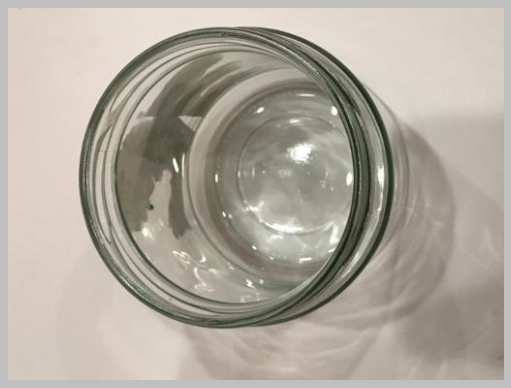

Predicted Class: white-glass


In [68]:
def predict_image_tflite(model_path, img_path, class_names, target_size=(224, 224)):
    # Load the TFLite model and allocate tensors.
    interpreter = tf.lite.Interpreter(model_path=model_path)
    interpreter.allocate_tensors()

    # Get input and output tensors.
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Preprocess the image
    input_data = preprocess_image(img_path, target_size)

    # Set the input tensor
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Run the inference
    interpreter.invoke()

    # Get the output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Get the predicted class
    predicted_class = np.argmax(output_data, axis=1)
    predicted_class_name = class_names[predicted_class[0]]

    return predicted_class_name

# Contoh penggunaan
path_image = "/kaggle/input/garbage-classification/garbage_classification/white-glass/white-glass109.jpg"
path_model_to_load = '/kaggle/working/GarbageClassification.tflite'

# Buka gambar
img = Image.open(path_image)

# Tampilkan gambar
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

predicted_class_name = predict_image_tflite(path_model_to_load, path_image, class_names)
print(f"Predicted Class: {predicted_class_name}")

# Make requirements.txt

In [ ]:
!pip freeze > requirements.txt